THIS NOTEBOOK HAS THE CODE FOR TRAINING A BASIC MULTI LAYER PERCEPTRON NEURAL NETWORK
FOR THE CLASSIFICATION OF IMAGES IN THE CLASSIC FASION MNIST DATASET

In [1]:
#importing the libraries
import tensorflow as tf

In [18]:
#importing the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (X_test, y_test) = fashion_mnist.load_data()

In [19]:
X_train , y_train = train_images[:-5000] , train_labels[:-5000]
X_valid , y_valid = train_images[-5000:] , train_labels[-5000:]

In [20]:
X_train.shape

(55000, 28, 28)

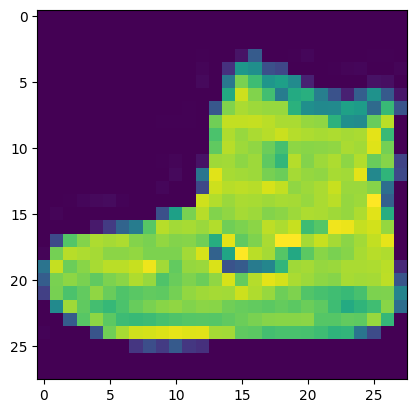

In [21]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])

In [22]:
import numpy as np

np.max(X_train[0]) , np.min(X_train[0])

(255, 0)

In [23]:
# for the sake of simpplicity we are scaling the pixel values of all the images to be between 0-1 for easy training

X_train , X_valid , X_test = X_train/255 , X_valid/255 , X_test/255 

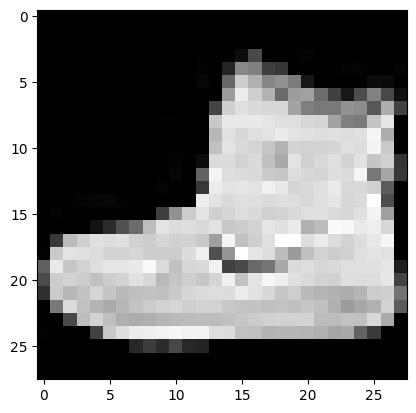

In [24]:
plt.imshow(X_train[0] , cmap='gray')

In [25]:
import numpy as np
np.max(X_train[0]) , np.min(X_train[0])

(1.0, 0.0)

In [26]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [28]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


BUILDING THE SEQUENTIAL MODEL 

In [29]:
tf.random.set_seed(42)
model = tf.keras.Sequential() # this is api that stacks a set of neurons(layers) in a sequential manner one on top of the other

model.add( tf.keras.layers.Input(shape=[28,28]) )  # this is the input layer
model.add( tf.keras.layers.Flatten() )

#these are the hidden layers
model.add(tf.keras.layers.Dense(300 , activation='relu') )
model.add(tf.keras.layers.Dense(100 , activation='relu') )

#this is the output layer
model.add(tf.keras.layers.Dense(10 , activation='softmax' ))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
#the bias and the weights for any layer can be accessed as follows
weights , bias = model.layers[1].get_weights()

In [32]:
weights , bias

(array([[ 0.0682418 , -0.01672832,  0.02143435, ...,  0.02600963,
         -0.04913595,  0.01647538],
        [-0.0616179 , -0.06163661, -0.00476813, ..., -0.04251377,
         -0.05444857,  0.03096561],
        [-0.06937395, -0.02794771, -0.04154961, ...,  0.05605806,
          0.01099898,  0.05685844],
        ...,
        [ 0.05260515,  0.00094099, -0.03054476, ...,  0.00412756,
         -0.06203688, -0.01389463],
        [ 0.07021371, -0.04404816, -0.01138112, ..., -0.01159635,
         -0.07275106, -0.04926927],
        [ 0.03115118, -0.01954119, -0.0225393 , ...,  0.05859208,
          0.00545432,  0.04316328]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

The model must now be compiled by specifying the loss and the accuracy mwtrics

In [33]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    metrics = ["accuracy"],
    optimizer = 'sgd'
)

In [34]:
history = model.fit(X_train , y_train , epochs=30 , validation_data=(X_valid , y_valid))

Epoch 1/30


1719/1719 [==============================] - 3s 2ms/step - loss: 0.7098 - accuracy: 0.7681 - val_loss: 0.5012 - val_accuracy: 0.8284
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4848 - accuracy: 0.8340 - val_loss: 0.4619 - val_accuracy: 0.8326
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4382 - accuracy: 0.8468 - val_loss: 0.4226 - val_accuracy: 0.8518
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4139 - accuracy: 0.8554 - val_loss: 0.3913 - val_accuracy: 0.8612
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3933 - accuracy: 0.8625 - val_loss: 0.3901 - val_accuracy: 0.8596
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3773 - accuracy: 0.8669 - val_loss: 0.3927 - val_accuracy: 0.8626
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3654 - accuracy: 0.8704 - val_loss: 0.3689 - val_accurac

In [35]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [36]:
history.history

{'loss': [0.7097644209861755,
  0.4848305881023407,
  0.4382278323173523,
  0.41392791271209717,
  0.39329683780670166,
  0.37731683254241943,
  0.3653871417045593,
  0.35400208830833435,
  0.34354010224342346,
  0.3334234654903412,
  0.3252173364162445,
  0.3175281882286072,
  0.31034326553344727,
  0.3030909299850464,
  0.2969612181186676,
  0.2900420129299164,
  0.28483396768569946,
  0.2788087725639343,
  0.2742721736431122,
  0.2692958116531372,
  0.2642001211643219,
  0.25843504071235657,
  0.2547939419746399,
  0.24958951771259308,
  0.24512802064418793,
  0.24177120625972748,
  0.23636169731616974,
  0.23334181308746338,
  0.22950245440006256,
  0.22546735405921936],
 'accuracy': [0.7680545449256897,
  0.8339999914169312,
  0.846818208694458,
  0.855400025844574,
  0.8624545335769653,
  0.8669090867042542,
  0.8704181909561157,
  0.8745999932289124,
  0.878636360168457,
  0.8811091184616089,
  0.8841999769210815,
  0.8853636384010315,
  0.8900908827781677,
  0.8915091156959534,

In [37]:
import pandas as pd

summary_df = pd.DataFrame(history.history)
summary_df

,loss,accuracy,val_loss,val_accuracy
0,0.709764,0.768055,0.501155,0.8284
1,0.484831,0.834000,0.461908,0.8326
2,0.438228,0.846818,0.422555,0.8518
3,0.413928,0.855400,0.391322,0.8612
4,0.393297,0.862455,0.390058,0.8596
5,0.377317,0.866909,0.392699,0.8626
6,0.365387,0.870418,0.368937,0.8674
7,0.354002,0.874600,0.370479,0.8652
8,0.343540,0.878636,0.348083,0.8778
9,0.333423,0.881109,0.347324,0.8738


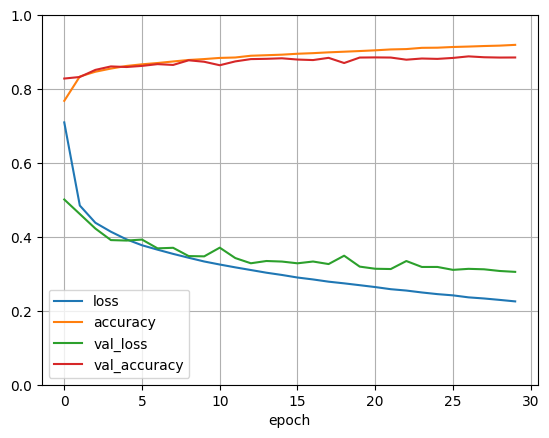

In [41]:
pd.DataFrame(history.history).plot(
    ylim=[0,1] , 
    grid=True , 
    xlabel='epoch'
)

plt.show()

Evaluating the model

In [42]:
model.evaluate(X_test , y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3235 - accuracy: 0.8854


[0.3235371708869934, 0.8853999972343445]

Making Predictions using the model

In [67]:
X_test[:20].shape

(20, 28, 28)

In [70]:
test = X_test[:20]
actual = y_test[:20]

y_probs = model.predict(test)
y_probs.round(3)
i=0

for preds in y_probs.round(2):
    image = np.max(preds)
    index = np.argmax(preds)
    print('the predicted class is ' ,  class_names[index] , 'The actual class is ' , class_names[actual[i]] )
    i+=1

1/1 [==============================] - 0s 23ms/step
the predicted class is  Ankle boot The actual class is  Ankle boot
the predicted class is  Pullover The actual class is  Pullover
the predicted class is  Trouser The actual class is  Trouser
the predicted class is  Trouser The actual class is  Trouser
the predicted class is  Shirt The actual class is  Shirt
the predicted class is  Trouser The actual class is  Trouser
the predicted class is  Coat The actual class is  Coat
the predicted class is  Shirt The actual class is  Shirt
the predicted class is  Sandal The actual class is  Sandal
the predicted class is  Sneaker The actual class is  Sneaker
the predicted class is  Coat The actual class is  Coat
the predicted class is  Sandal The actual class is  Sandal
the predicted class is  Sandal The actual class is  Sneaker
the predicted class is  Dress The actual class is  Dress
the predicted class is  Coat The actual class is  Coat
the predicted class is  Trouser The actual class is  Trouser

In [74]:
def get_pred( model ,  test , actual):
    plt.imshow(test)

    #tgetting the model prediction
    preds = y_probs = model.predict(test.reshape(1,-1))
    y_probs.round(3)
    index = np.argmax(y_probs.round(3))

    #getting the predicted class
    pred_label = class_names[index]
    
    print("This image is classified as " , pred_label , 'The actual label was' , actual)

(<matplotlib.image.AxesImage at 0x1e3fcf8fbd0>, 'Pullover')

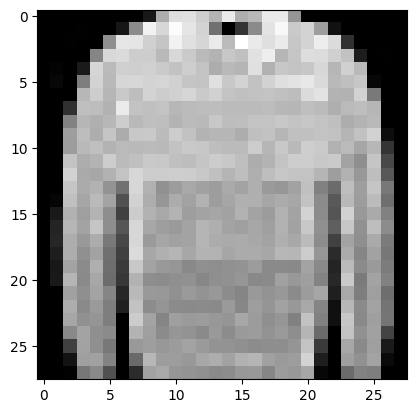

In [76]:
plt.imshow(X_test[20] , cmap='gray') , class_names[y_test[20]]


1/1 [==============================] - 0s 31ms/step
This image is classified as  Pullover The actual label was Pullover


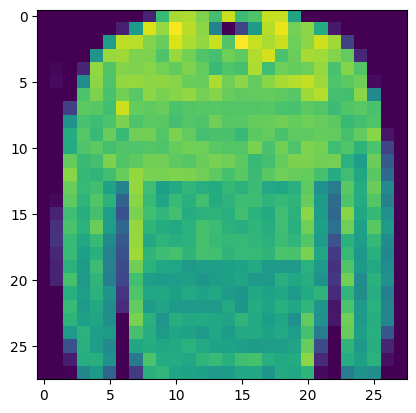

In [77]:
get_pred(model , X_test[20] , 'Pullover')